## HDFC Bank Stock prediction for March-April 2021 using Keras and RNN(LSTM)

#### Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
# Importing the training set
dataset_train = pd.read_csv('HDFCBANK_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,VWAP,Prev Close,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,03-01-2000,166.00,170.00,166.00,170.00,170.00,169.52,157.40,33259,5.640000e+11,NaN,NaN,NaN
1,04-01-2000,182.00,183.45,171.00,174.00,173.80,174.99,170.00,168710,2.950000e+12,NaN,NaN,NaN
2,05-01-2000,170.00,173.90,165.00,168.00,166.95,169.20,173.80,159820,2.700000e+12,NaN,NaN,NaN
3,06-01-2000,168.00,170.00,165.30,168.95,168.30,168.44,166.95,85026,1.430000e+12,NaN,NaN,NaN
4,07-01-2000,162.15,171.00,162.15,170.75,168.35,166.79,168.30,85144,1.420000e+12,NaN,NaN,NaN


In [4]:
# Using Columns Open as Training Dataset
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print("X_train shape :" , X_train.shape)
print("Y_train shape :" , y_train.shape)

X_train shape : (5206, 60)
Y_train shape : (5206,)


In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train shape :" , X_train.shape)

X_train shape : (5206, 60, 1)


#### Building the RNN(Recurrent Neural Network)

In [8]:
# Imporing Keras
import keras

In [9]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# Initialising the RNN
regressor = Sequential()

In [11]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [13]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [14]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [15]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [16]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
print(regressor.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

#### Fitting the RNN to the Training set

In [18]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 38, batch_size = 32)

Epoch 1/38
163/163 [==============================] - 15s 93ms/step - loss: 0.0105
Epoch 2/38
163/163 [==============================] - 15s 93ms/step - loss: 0.0044
Epoch 3/38
163/163 [==============================] - 15s 92ms/step - loss: 0.0032
Epoch 4/38
163/163 [==============================] - 15s 95ms/step - loss: 0.0033
Epoch 5/38
163/163 [==============================] - 16s 98ms/step - loss: 0.0029
Epoch 6/38
163/163 [==============================] - 16s 98ms/step - loss: 0.0025
Epoch 7/38
163/163 [==============================] - 16s 100ms/step - loss: 0.0025
Epoch 8/38
163/163 [==============================] - 16s 96ms/step - loss: 0.0022
Epoch 9/38
163/163 [==============================] - 16s 98ms/step - loss: 0.0021
Epoch 10/38
163/163 [==============================] - 19s 116ms/step - loss: 0.0021
Epoch 11/38
163/163 [==============================] - 18s 113ms/step - loss: 0.0022
Epoch 12/38
163/163 [==============================] - 18s 111ms/step - loss: 0.00

#### Making the predictions and visualising the results

In [22]:
# Getting the real stock price of March-April 2021
dataset_test = pd.read_csv('HDFCBANK_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [25]:
print("Shape of actual array of Stock price for March-April 2021: ", real_stock_price.shape)

Shape of actual array of Stock price for March-April 2021:  (40, 1)


In [26]:
# Getting the predicted stock price of March-April 2021
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


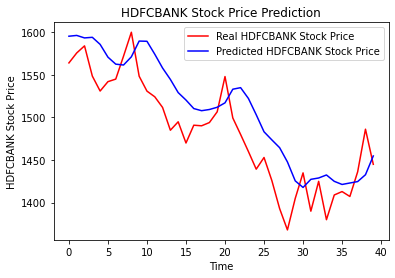

In [27]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real HDFCBANK Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted HDFCBANK Stock Price')
plt.title('HDFCBANK Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFCBANK Stock Price')
plt.legend()
plt.show()
